In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing import image

In [3]:
src_dir = 'image_data'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')


In [4]:
print('paper : ',len(os.listdir(paper_dir)))
print('rock : ',len(os.listdir(rock_dir)))
print('scissors : ',len(os.listdir(scissors_dir)))


paper :  800
rock :  800
scissors :  800


(500, 350, 3)

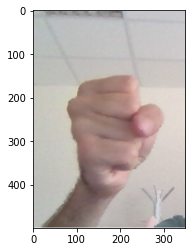

In [5]:
img_dir = 'image_data/rock/425.jpg'
pic=tf.keras.preprocessing.image.load_img(img_dir)
pic_arr=tf.keras.preprocessing.image.img_to_array(pic, data_format=None, dtype=None)
pic_arr=pic_arr/255
plt.gray()
plt.imshow(pic_arr)
pic_arr.shape

In [6]:
IMG_SIZE_X=200
IMG_SIZE_Y=150

data_generator = ImageDataGenerator  (validation_split=0.2,
                                   
                                    rescale=1./255)
train_data = data_generator.flow_from_directory(src_dir,
                                                    target_size=(IMG_SIZE_X,IMG_SIZE_Y),
                                                    subset='training')

test_data = data_generator.flow_from_directory(src_dir,
                                                target_size=(IMG_SIZE_X, IMG_SIZE_Y),    
                                                 subset='validation')

train_data.class_indices

Found 1920 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


{'paper': 0, 'rock': 1, 'scissors': 2}

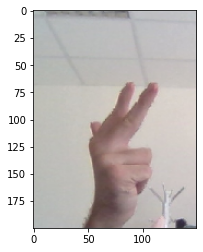

In [18]:

X_train, y_train = train_data.next()
plt.imshow(X_train[0])

In [28]:
model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE_X, IMG_SIZE_Y, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 48, 36, 64)       

In [30]:
class TargetCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.98):
            print("\nModel Has Reached %2.2f%% accuracy, training stopped" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callback = TargetCallback()

In [31]:
predictions = model.fit(
    train_data,
    steps_per_epoch=25,
    epochs = 20,
    validation_data = test_data,
    validation_steps=5,
    verbose = 2,
    callbacks = [callback]
    )

Epoch 1/20
25/25 - 16s - loss: 1.3663 - accuracy: 0.3475 - val_loss: 1.0893 - val_accuracy: 0.5625 - 16s/epoch - 648ms/step
Epoch 2/20
25/25 - 15s - loss: 0.9795 - accuracy: 0.5300 - val_loss: 0.9161 - val_accuracy: 0.6750 - 15s/epoch - 620ms/step
Epoch 3/20
25/25 - 16s - loss: 0.4351 - accuracy: 0.8425 - val_loss: 0.5775 - val_accuracy: 0.7563 - 16s/epoch - 649ms/step
Epoch 4/20
25/25 - 15s - loss: 0.1882 - accuracy: 0.9362 - val_loss: 0.4400 - val_accuracy: 0.8062 - 15s/epoch - 596ms/step
Epoch 5/20
25/25 - 15s - loss: 0.1391 - accuracy: 0.9538 - val_loss: 0.4637 - val_accuracy: 0.8000 - 15s/epoch - 583ms/step
Epoch 6/20
25/25 - 15s - loss: 0.0775 - accuracy: 0.9737 - val_loss: 0.4520 - val_accuracy: 0.8062 - 15s/epoch - 583ms/step
Epoch 7/20

Model Has Reached 99.37% accuracy, training stopped
25/25 - 15s - loss: 0.0328 - accuracy: 0.9937 - val_loss: 0.3783 - val_accuracy: 0.8000 - 15s/epoch - 582ms/step


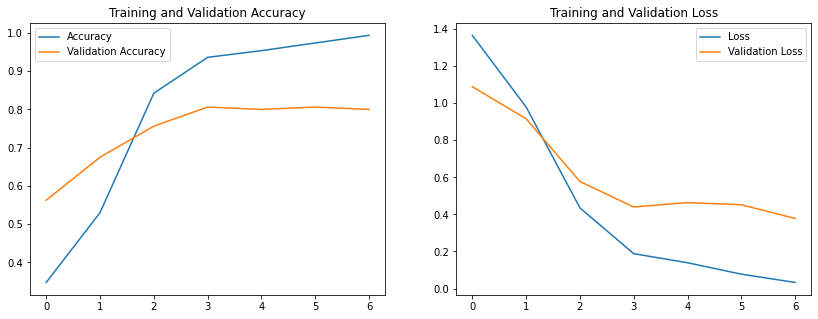

In [32]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(predictions.history['accuracy'], label='Accuracy'),
plt.plot(predictions.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(predictions.history['loss'], label='Loss')
plt.plot(predictions.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')

plt.show()

1/1 [==============================] - 0s 22ms/step
[[0. 0. 1.]]
Scissors


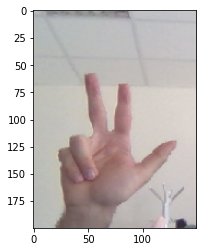

In [39]:
uploaded = os.path.join(scissors_dir,'444.jpg')
img = tf.keras.preprocessing.image.load_img(uploaded, target_size = (IMG_SIZE_X, IMG_SIZE_Y))
 
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

c = model.predict(images)  
print(c)

if c[0, 0] == 1:
  print('Rock')
elif c[0, 1] == 1:
  print('Paper')
else:
  print('Scissors')


In [34]:
model.evaluate(test_data)

15/15 [==============================] - 2s 102ms/step - loss: 0.3019 - accuracy: 0.8500


[0.3018568754196167, 0.8500000238418579]

In [37]:
model.save("rock-paper-scissors-model.h5")

In [10]:
mymodel= tf.keras.models.load_model("rock-paper-scissors-model.h5")



1/1 [==============================] - 0s 20ms/step
[[0. 0. 1.]]
Scissors


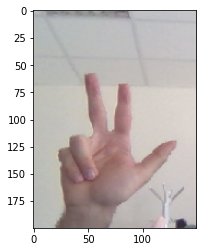

In [14]:
uploaded = os.path.join(scissors_dir,'444.jpg')
img = tf.keras.preprocessing.image.load_img(uploaded, target_size = (IMG_SIZE_X, IMG_SIZE_Y))
 
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


c = mymodel.predict(images)  
print(c)

if c[0, 0] == 1:
  print('Rock')
elif c[0, 1] == 1:
  print('Paper')
else:
  print('Scissors')
test_data

In [21]:
mymodel.evaluate(images,images)

ValueError: in user code:

    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\engine\training.py", line 1501, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\users\smurf\pycharmprojects\internship\venv\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 200, 150, 3) and (None, 3) are incompatible
